<a href="https://colab.research.google.com/github/udaykiranreddykondreddy/Code-for-learn-machinelearning/blob/master/autoencoders/Autoencoder_CNN_autoencoder.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://drive.google.com/uc?export=view&id=1xZggtEjnrMp9QBm_4q5RJIfJyfSoSJ9p" height="150" align="left"/>
<h1>&nbsp;<a href="https://instagram.com/learn.machinelearning">Learn.MachineLearning</a></h1>
<h2>&nbsp;AutoEncoders</h2>
<h2>&nbsp;Deep Autoencoders, Convolutional autoencoder</h2>

<img src="http://drive.google.com/uc?export=view&id=1vG1zdxXrp7Yp5naC8PgMl5UlpXXjou9Z" height="500"/>

**<h3>What is Autoencoder??</h3>**

- It is an unsupervised learning neural network
- It tries to ReGenerate the input
- It has 2 components Encoder and Decoder




<img src="http://drive.google.com/uc?export=view&id=1UuRc-yEc-YGAlEa8RHqp3V2z3-uANlpA" height="500"/>

**<h3>What is Encoder??</h3>**

- Aim of encoder is to compress the data
- It tries to find the function that maps input data (X) to compressed data (H)
\begin{equation} H  = f(X) \end{equation}


<img src="http://drive.google.com/uc?export=view&id=1QHtS0GxdfbGf3GId-4PjK_YhElF7PljE" height="500"/>

**<h3>What is Latent Vector??</h3>**

 - It is a learned representation of input data in a low dimension space. 


<img src="http://drive.google.com/uc?export=view&id=1qTkQx76aBJNhsk3ITrUBEfDQzDQtzMc0" height="500"/>


**<h3>What is Decoder??</h3>**

- It tries to reconstruct the input from latent vector
- It also try to find the function that maps the latent vector to reconstructed data
\begin{equation} \hat{{X}}  = g(H) \end{equation}

<img src="http://drive.google.com/uc?export=view&id=1kHLR8RgP2Ci8u0LGz5pHlhxBbz7n0E_y" height="500"/>


- So final equation can be written as 
\begin{equation} \hat{{X}}  = g(f(X)) \end{equation}

<img src="http://drive.google.com/uc?export=view&id=15zm2U3EaH4UkKm04GXB_sSZGaUPevBgz" height="500"/>

**<h3>Calculating Loss</h3>**

- We want to improve our model right??
- So we calcuate the loss and then based on the loss we update the weights using backpropagation.
- This loss is called as reconstruction error.
- Mostly we use Squared error. 
\begin{equation} Loss(X,\hat{{X}})  = || X - \hat{{X}} ||^{{2}} \end{equation}

**<h3>Applications of Autoencoders</h3>**

- Dimensionality reduction
- Anomaly/outlier detection
- Denoising 
- word embeddings
- Text summarization


**<h3>Types</h3>**

- Sparse autoencoder
- Autoencoder
- Convolutional autoencoder
- Denoising
- Sequence-to-sequence autoencoder
- Variational autoenoder

**```
Lets understand this with an example (Image reconstruction)
```**

**<h3> Deep AutoEncoder </h3>**

In [0]:
# Importing libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA

In [0]:
# Load dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, 784]), x_test.reshape([-1, 784])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# input placeholder
input_img = tf.keras.layers.Input(shape=(784,), name = "input")

# this is the encoded representation of the input
encoded = tf.keras.layers.Dense(128, activation='relu', name="emb_1")(input_img)
encoded = tf.keras.layers.Dense(64, activation='relu', name="emb_2")(encoded)
encoded = tf.keras.layers.Dense(16, activation='relu', name="emb_4")(encoded)
latent_vector = tf.keras.layers.Dense(2, activation='relu', name="latent_vector")(encoded)

In [0]:
# this is the loss reconstruction of the input
decoded = tf.keras.layers.Dense(16, activation='relu', name="dec_1")(latent_vector)
decoded = tf.keras.layers.Dense(64, activation='relu', name="dec_3")(decoded)
decoded = tf.keras.layers.Dense(128, activation='relu', name="dec_4")(decoded)
output_layer = tf.keras.layers.Dense(784, activation = 'sigmoid', name="output")(decoded)


In [0]:
# this model maps an input to its recommendation
autoencoder = tf.keras.models.Model(input_img, output_layer)

In [0]:
autoencoder.summary()

Model: "model_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
emb_1 (Dense)                (None, 128)               100480    
_________________________________________________________________
emb_2 (Dense)                (None, 64)                8256      
_________________________________________________________________
emb_4 (Dense)                (None, 16)                1040      
_________________________________________________________________
latent_vector (Dense)        (None, 2)                 34        
_________________________________________________________________
dec_1 (Dense)                (None, 16)                48        
_________________________________________________________________
dec_3 (Dense)                (None, 64)                108

In [0]:
# let's also create a seprate encoder model
# this mode maps an input to its encoded representation
encoder = tf.keras.models.Model(input_img, latent_vector)
encoder.summary()

Model: "model_37"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
emb_1 (Dense)                (None, 128)               100480    
_________________________________________________________________
emb_2 (Dense)                (None, 64)                8256      
_________________________________________________________________
emb_4 (Dense)                (None, 16)                1040      
_________________________________________________________________
latent_vector (Dense)        (None, 2)                 34        
Total params: 109,810
Trainable params: 109,810
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Now let's train our autoencoder to reconstruct MNIST digits
autoencoder.compile(optimizer='adam', loss='mse')

In [0]:
# now let's train our autoencoder for 100 epochs
autoencoder.fit(x_train, x_train, epochs=100, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 1s 6ms/step - loss: 0.0813 - val_loss: 0.0585
Epoch 2/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0556 - val_loss: 0.0523
Epoch 3/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0509 - val_loss: 0.0494
Epoch 4/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0480 - val_loss: 0.0468
Epoch 5/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0461 - val_loss: 0.0455
Epoch 6/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0449 - val_loss: 0.0445
Epoch 7/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0440 - val_loss: 0.0438
Epoch 8/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0433 - val_loss: 0.0433
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0428 - val_loss: 0.0429
Epoch 10/100
235/235 [==============================] - 1s 5ms/step - loss: 0.0423 - val_lo

In [0]:
#encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)

NameError: ignored

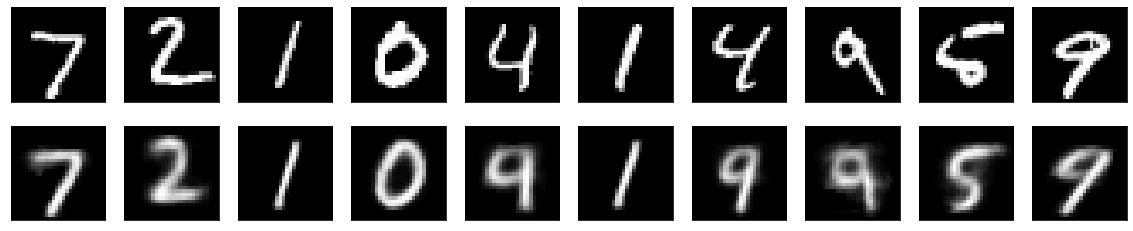

In [0]:
n = 10 
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [0]:
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x_test)
principalDf = pd.DataFrame(data = principalComponents,columns = ['principal component 1', 'principal component 2'])
principalDf["label"] = y_test


In [0]:
pca.explained_variance_ratio_

array([0.10047699, 0.07544512], dtype=float32)

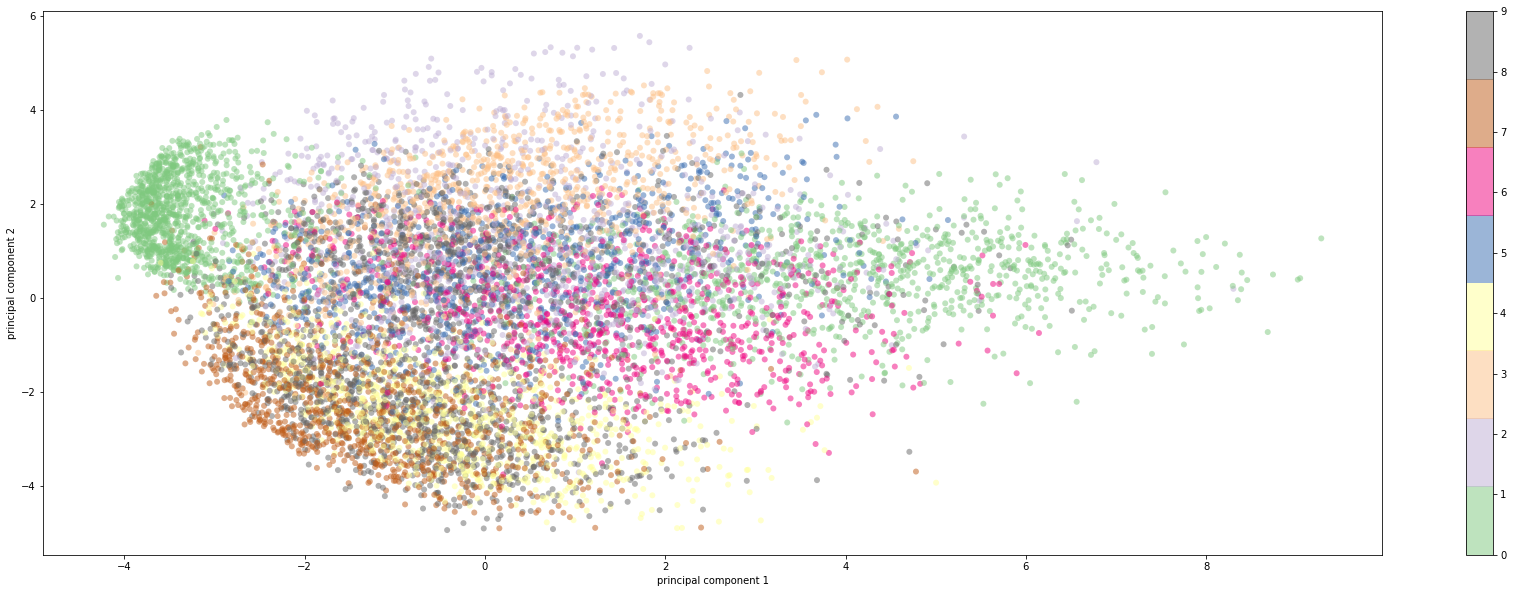

In [0]:
# Visualize
fig, ax = plt.subplots(figsize=(30,10))
plt.scatter(principalDf['principal component 1'], principalDf["principal component 2"],
            c=principalDf["label"], edgecolor='none', alpha=0.5,
            cmap="Accent")
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar();

In [0]:
# Dimentionality reduction with encoder vector using PCA
principalComponents = encoder.predict(x_test)

#ca = PCA(n_components=2)
#principalComponents = pca.fit_transform(encoded_imgs)
principalDf = pd.DataFrame(data = list(principalComponents),columns = ['principal component 1', 'principal component 2'])
principalDf["label"] = y_test


In [0]:
pca.explained_variance_ratio_

array([0.10047699, 0.07544512], dtype=float32)

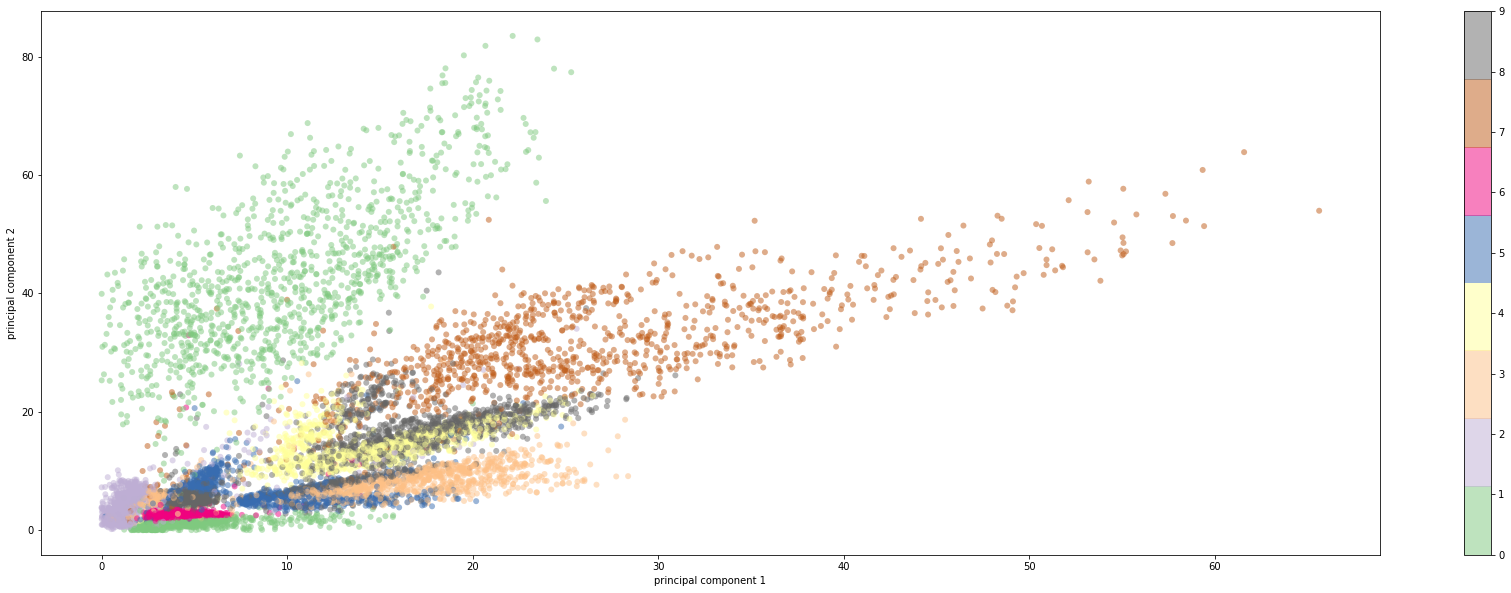

In [0]:
# Visualize
fig, ax = plt.subplots(figsize=(30,10))
plt.scatter(principalDf['principal component 1'], principalDf["principal component 2"],
            c=principalDf["label"], edgecolor='none', alpha=0.5,
            cmap="Accent")
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.colorbar();

**<h3>Convolutional autoencoder</h3>**

<img src="https://miro.medium.com/max/1400/1*uAeANQIOQPqWZnnuH-VEyw.jpeg" height="250"/>


**Kernel operation**

<img src="https://miro.medium.com/max/1000/1*GcI7G-JLAQiEoCON7xFbhg.gif" height="250"/>


**Pooling layer**

<img src="https://miro.medium.com/max/792/1*uoWYsCV5vBU8SHFPAPao-w.gif" height="250"/>


In [0]:
# Data

# Load dataset 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = x_train.astype(np.float32), x_test.astype(np.float32)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [0]:
# Building encoder

input_img = tf.keras.layers.Input(shape=(28, 28, 1)) # adapt this if using `channels_first` image data format

x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)


In [0]:
# Building decoder 

x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
x = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = tf.keras.layers.UpSampling2D((2, 2))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

In [0]:
# Building Autoencoder

autoencoder = tf.keras.models.Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.summary()

Model: "model_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)           0  

In [0]:
# Train the model
autoencoder.fit(x_train, x_train, epochs=200, batch_size=128, shuffle=True, validation_data=(x_test, x_test)])

Epoch 1/200
469/469 [==============================] - 7s 14ms/step - loss: 0.6776 - val_loss: 0.6745
Epoch 2/200
469/469 [==============================] - 6s 14ms/step - loss: 0.6696 - val_loss: 0.6638
Epoch 3/200
469/469 [==============================] - 6s 14ms/step - loss: 0.6537 - val_loss: 0.6407
Epoch 4/200
469/469 [==============================] - 6s 14ms/step - loss: 0.6140 - val_loss: 0.5768
Epoch 5/200
469/469 [==============================] - 6s 14ms/step - loss: 0.5198 - val_loss: 0.4781
Epoch 6/200
469/469 [==============================] - 6s 14ms/step - loss: 0.4605 - val_loss: 0.4539
Epoch 7/200
469/469 [==============================] - 6s 14ms/step - loss: 0.4404 - val_loss: 0.4355
Epoch 8/200
469/469 [==============================] - 6s 14ms/step - loss: 0.4224 - val_loss: 0.4177
Epoch 9/200
469/469 [==============================] - 6s 14ms/step - loss: 0.4053 - val_loss: 0.4010
Epoch 10/200
469/469 [==============================] - 6s 14ms/step - loss: 0.389

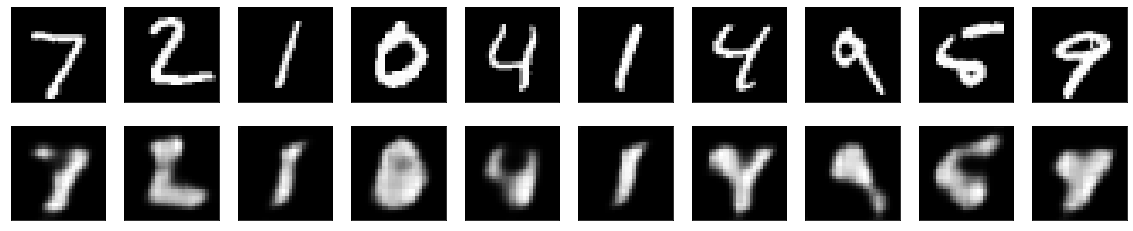

In [0]:
# Visualize 
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()